In [1]:
#### General imports
import os
import urllib
import pandas as panda
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV




# use matplotlib in jupyter output
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

<h1>Prepare dataset</h1>

In [ ]:
# download dataset

DOWNLOAD_URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
DATASET_REL_PATH = os.path.join("dataset/")
REDWINE_PATH = os.path.join(DATASET_REL_PATH, 'winequality-red.csv')
WHITEWINE_PATH = os.path.join(DATASET_REL_PATH, 'winequality-white.csv')


if not os.path.isdir(DATASET_REL_PATH):
    os.makedirs(DATASET_REL_PATH)

urllib.request.urlretrieve(DOWNLOAD_URL + 'winequality-red.csv', REDWINE_PATH)
urllib.request.urlretrieve(DOWNLOAD_URL + 'winequality-white.csv', WHITEWINE_PATH)


In [3]:
## Loading the wine dataset

redwinePanda = panda.read_csv(REDWINE_PATH,';')
whitewinePanda = panda.read_csv(WHITEWINE_PATH,';')


In [4]:
#redwinePanda.head()
whitewinePanda.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#redwinePanda.info()
whitewinePanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
whitewinePanda.describe()
#redwinePanda.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


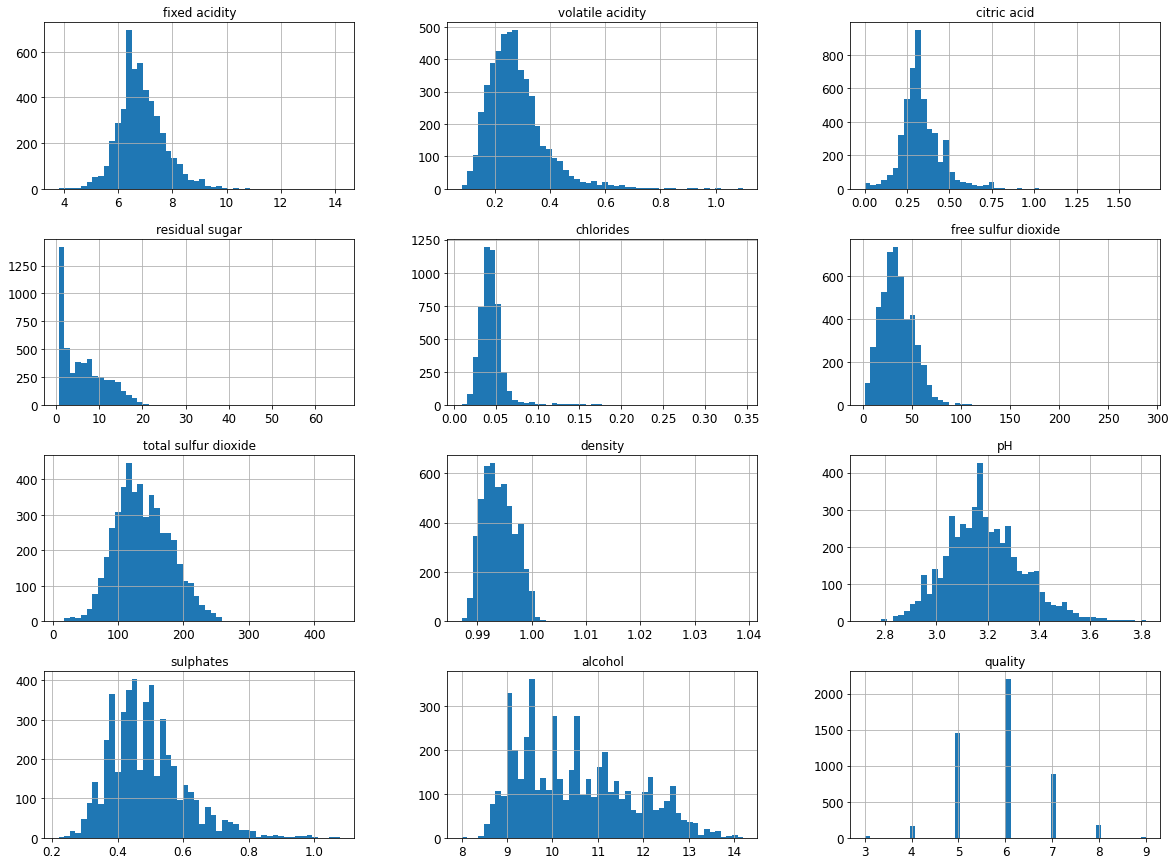

In [7]:
#redwinePanda.hist(bins=50, figsize=(20,15))
whitewinePanda.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#How much does each of the new attributes correlate with the price?
corr_matrix = redwinePanda.corr()
# corr_matrix = whitewinePanda.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [9]:
#How much does each of the new attributes correlate with the median house value?
#corr_matrix = redwinePanda.corr()
corr_matrix = whitewinePanda.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [10]:
#free sulfur dioxide har mindst med begge vine at gøre

<h1>Data preperation</h1>

In [11]:


##Remove quality label from the trainingset
redwinePredictors = redwinePanda.drop("quality", axis=1)
whitewinePredictors = whitewinePanda.drop("quality", axis=1)
redwinelabels = redwinePanda["quality"].copy()
whitewinelabels = whitewinePanda["quality"].copy()



In [12]:
## scale values to be between 0 and 1
scaler = StandardScaler()
redwineTrainScaled = scaler.fit_transform(redwinePredictors)
whitewineTrainScaled = scaler.fit_transform(whitewinePredictors)

redwineTrainScaled


array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

<h1>Random Forest Regressor</h1>

In [13]:
# Train a Linear Regression model.
from sklearn.ensemble import RandomForestRegressor
rndRegressor = RandomForestRegressor(n_estimators=500, 
                                    bootstrap=True, 
                                    oob_score=True,
                                    n_jobs=-1)

rndRegressor.fit(redwinePredictors, redwinelabels)

RandomForestRegressor(n_estimators=500, n_jobs=-1, oob_score=True)

In [14]:
rndRegressor.oob_score_

0.514417502074873

In [15]:
redwinePredictions = rndRegressor.predict(redwinePredictors)
np.sqrt(mean_squared_error(redwinelabels, redwinePredictions))


0.20728856780817648

In [16]:
redwinePanda.info()
rndRegressor.feature_importances_


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([0.05023412, 0.12840326, 0.04857544, 0.05599657, 0.06216373,
       0.04876236, 0.07981414, 0.0537306 , 0.05846806, 0.13772717,
       0.27612455])

<h1> Tweaking Hyperperameters </h1>


In [17]:
RandomForestRegressor.get_params(RandomForestRegressor).keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# Split the training data in a training set and a validation set.
X_train, X_test, y_train, y_test = train_test_split(redwinePredictors, redwinelabels)

params = {'max_depth': list(range(2, 6)),'max_leaf_nodes': list(range(5, 10)), 'min_samples_split': [5, 10, 20] , 'n_estimators': [300, 400, 500], 'n_jobs': [2,3,4]}
gridSearchCV = GridSearchCV(RandomForestRegressor(bootstrap=True, oob_score=True,), params, cv=3)

# Train
gridSearchCV.fit(X_train, y_train)


In [ ]:
# Get the best estimator:
gridSearchCV.best_estimator_

In [ ]:
# Evaluate the model's accuracy:
rndRegressorredwinePredictions = gridSearchCV.predict(X_train)
np.sqrt(mean_squared_error(y_train, rndRegressorredwinePredictions))
